In [157]:
import pandas as pd
df = pd.read_csv(r"weather-data.csv")

In [159]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M')
df['Date'] = df['Date/Time'].dt.date
df['Hour'] = df['Date/Time'].dt.hour

In [161]:
# Filtrar dados para períodos de dia e noite
filtro_dia = (df['Hour'] >= 6) & (df['Hour'] < 18)
filtro_noite = (df['Hour'] >= 18) | (df['Hour'] < 6)
day_data = df[filtro_dia]
night_data = df[filtro_noite]

day_temp_mean = day_data.groupby('Date')['Temp_C'].mean()
night_temp_mean = night_data.groupby('Date')['Temp_C'].mean()


In [163]:
daily_mean_temp = df.groupby('Date')['Temp_C'].mean()

hottest_day = daily_mean_temp.idxmax()
coldest_day = daily_mean_temp.idxmin()

hottest_temp = daily_mean_temp.max()
coldest_temp = daily_mean_temp.min()

print(f'Dia mais quente: {hottest_day} com uma temperatura média de {hottest_temp:.2f}°C')
print(f'Dia mais frio: {coldest_day} com uma temperatura média de {coldest_temp:.2f}°C')

Dia mais quente: 2012-06-21 com uma temperatura média de 28.37°C
Dia mais frio: 2012-01-15 com uma temperatura média de -18.98°C


In [165]:

daily_mean_wind_speed = df.groupby('Date')['Wind Speed_km/h'].mean()
windiest_day = daily_mean_wind_speed.idxmax()
windiest_speed = daily_mean_wind_speed.max()

print(f'Dia com a maior média de velocidade do vento: {windiest_day} com uma média de {windiest_speed:.2f} km/h')

Dia com a maior média de velocidade do vento: 2012-04-23 com uma média de 41.58 km/h


In [167]:
import matplotlib.pyplot as plt

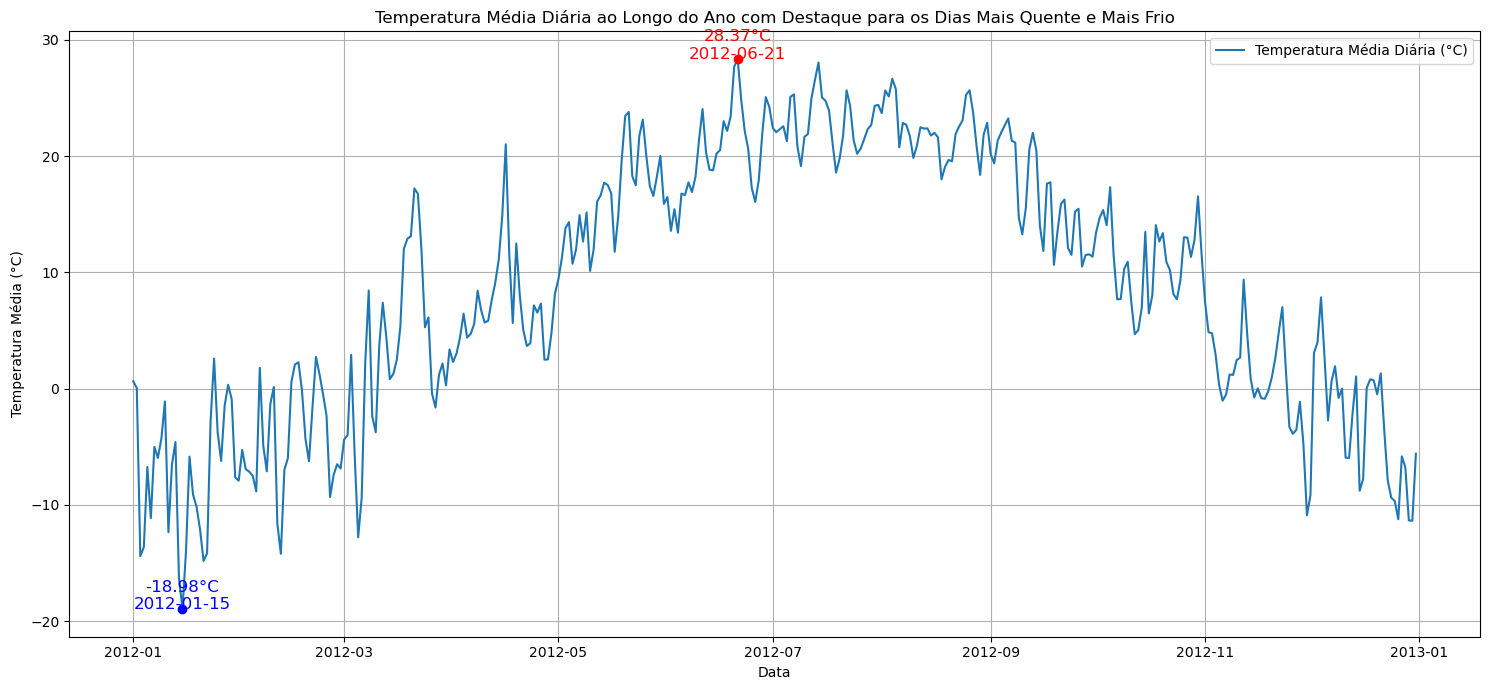

In [169]:
plt.figure(figsize=(15, 7))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, label='Temperatura Média Diária (°C)')
plt.scatter([hottest_day], [hottest_temp], color='red', zorder=5)  # Destacar o dia mais quente
plt.scatter([coldest_day], [coldest_temp], color='blue', zorder=5)  # Destacar o dia mais frio
plt.text(hottest_day, hottest_temp, f'{hottest_temp:.2f}°C\n{hottest_day}', color='red', fontsize=12, ha='center')
plt.text(coldest_day, coldest_temp, f'{coldest_temp:.2f}°C\n{coldest_day}', color='blue', fontsize=12, ha='center')
plt.title('Temperatura Média Diária ao Longo do Ano com Destaque para os Dias Mais Quente e Mais Frio')
plt.xlabel('Data')
plt.ylabel('Temperatura Média (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

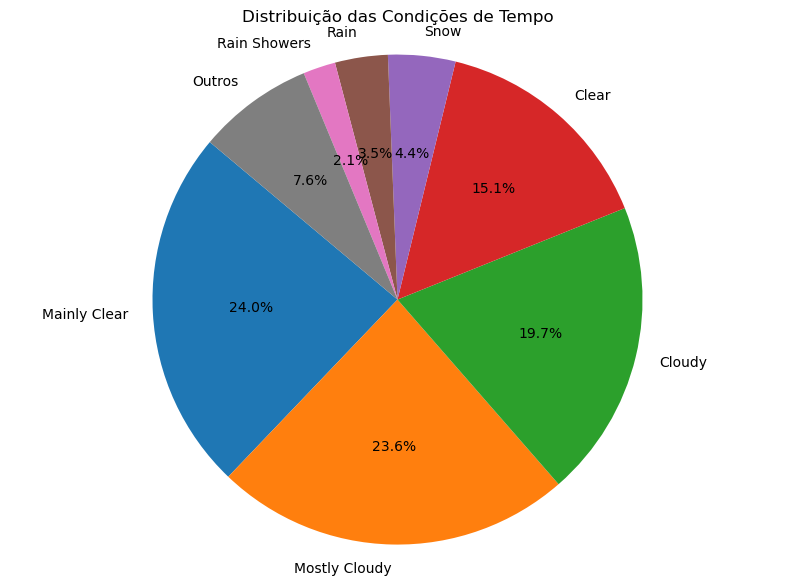

In [171]:
weather_counts = df['Weather'].value_counts()

# Calcular a proporção de cada condição de tempo
weather_proportions = weather_counts / weather_counts.sum()

threshold = 0.02
weather_counts_filtered = weather_counts[weather_proportions >= threshold]
weather_counts_other = weather_counts[weather_proportions < threshold].sum()

if weather_counts_other > 0:
    weather_counts_filtered['Outros'] = weather_counts_other

plt.figure(figsize=(10, 7))
plt.pie(weather_counts_filtered, labels=weather_counts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Condições de Tempo')
plt.axis('equal')
plt.show()

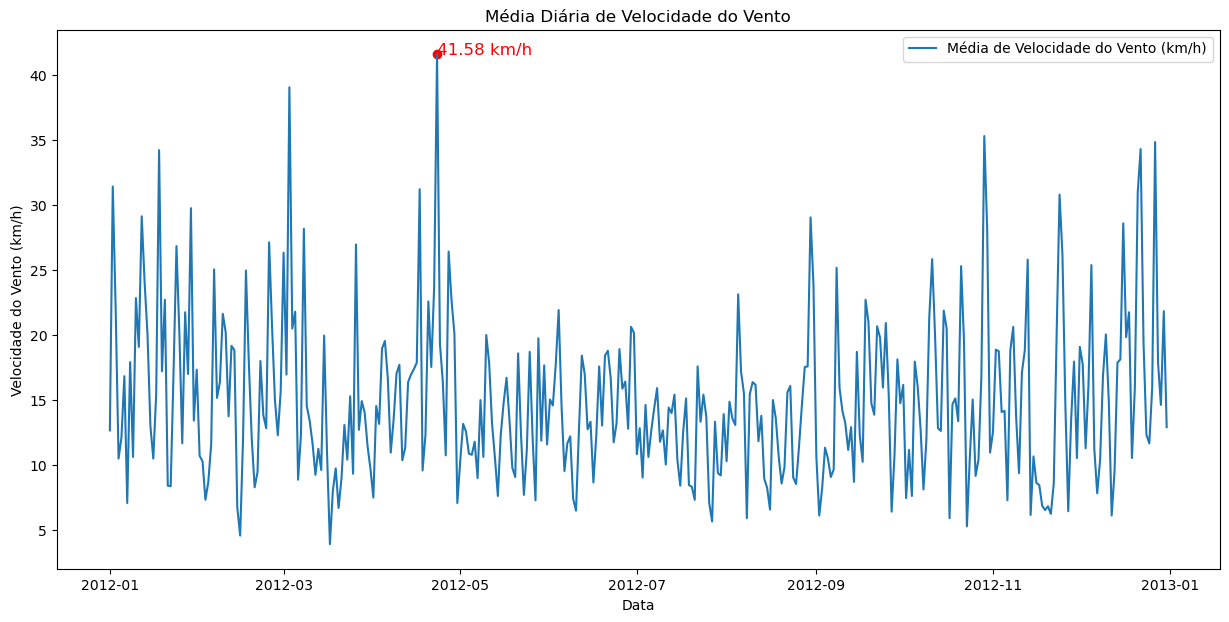

In [173]:
# Calcular a média da velocidade do vento para cada dia
daily_mean_wind_speed = df.groupby('Date')['Wind Speed_km/h'].mean()

# Encontrar o dia com a maior média de velocidade do vento
windiest_day = daily_mean_wind_speed.idxmax()
windiest_speed = daily_mean_wind_speed.max()

# Gráfico de linha
plt.figure(figsize=(15, 7))
plt.plot(daily_mean_wind_speed.index, daily_mean_wind_speed.values, label='Média de Velocidade do Vento (km/h)')
plt.scatter([windiest_day], [windiest_speed], color='red')  # Highlight windiest day
plt.text(windiest_day, windiest_speed, f'{windiest_speed:.2f} km/h', color='red', fontsize=12)
plt.title('Média Diária de Velocidade do Vento')
plt.xlabel('Data')
plt.ylabel('Velocidade do Vento (km/h)')
plt.legend()
plt.show()